<a href="https://colab.research.google.com/github/hellen2021/Neural-Networks/blob/main/Driver_Drowsiness_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ##                                           **DRIVER DROWSINESS DETECTION**

## 1. **Defining the Question**

#### a) **Specifying the Data Analytic Question**


To build a model that detects whether a driver is drowsy or not.

#### b) **Defining the Metric for Success**

Creating a model that accurately predicts whether a driver is drowsy or not. 

The model should attain an accuracy of over 90%. 

#### c) **Understanding the context**

Drivers who do not take regular breaks when driving long distances run a high risk of becoming drowsy a state which they often fail to recognize early enough. There are several causes of road accidents: driver negligence, weather conditions, road invisibility, drowsiness, alcohol consumption, etc. Alcohol consumption is the main reason for the majority of road accidents (Elizabeth King, 2016). In comparison, driver drowsiness is the second signiﬁcant cause (Mathilde Carlier, 2022; Statista).

In this project, we are going to build a driver drowsiness detection system that will detect if the eyes of the driver are close for too long and infer if the driver is sleepy or inactive.

#### d) **Recording the Experimental Design**



 1. Define the question, the metric for success, understanding the context and recording the experimental design.

 2. Import the libraries, loading data, read the data and image pre processing the images.

 3. Define the appropriateness of the available data to answer the given question.

 4. Image pre_processing which included:(i) Reshaping of the images.
                                        (ii) Reading all the images and converting them into an array of labels and features.
                                        (iii) Shuffling the images to be picked at random to avoid overfitting.
                                        (iv) Normalizing the pixels of the images.

5. Build the model using Convolutional Neural Networks.

6. Challenge the solution.

7. Conclusions and Recommendations.

#### e) **Data Relevance**

The dataset was sourced from kaggle. 

It contains data with different aspects of images. The data contains open and closed eyes.



In [ ]:
#Importing the relevant libraries
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Displaying one of the images
image_array = cv2.imread(r"C:\Users\PETER\Desktop\New folder\Train_data\Closed\_271.jpg",cv2.IMREAD_GRAYSCALE)

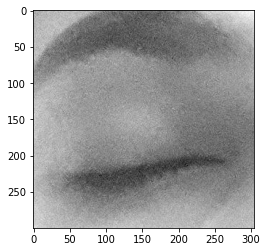

In [ ]:
#using matplotlib to display the image
plt.imshow(image_array,cmap='gray')

## 2. **Loading and Reading the Data.**

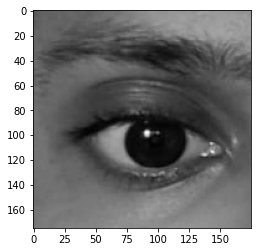

In [ ]:
#Loading the data

data = r"C:\Users\PETER\Desktop\New folder\Eyes" #The training dataset based on the eyes
classes = ['Open','Closed'] #list of our classes
for category in classes:
  path = os.path.join(data,category)
  for image in os.listdir(path):
    image_array =cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
    back = cv2.cvtColor(image_array,cv2.COLOR_GRAY2BGR)
    plt.imshow(image_array, cmap = 'gray')
    plt.show()
    break
  break

## 3. **Data Preparation**

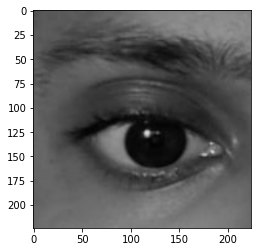

In [ ]:
# Resizing the image
image_size = 224

new_array = cv2.resize(back,(image_size,image_size))
plt.imshow(new_array,cmap= 'gray') # Plotting the resized image
plt.show()

In [ ]:
# Shape of the image

new_array.shape

(224, 224, 3)

In [ ]:
# Reading all the eyes images and converting them into an array of labels and features
# Creating a list
training_data = []  
def create_training_data(): 
     ## Open or closed
    for category in classes: 
        # Defining path os library will help in accessing the directory.
        path = os.path.join(data,category)
        # classes 0 or 1
        class_number = classes.index(category) 
        for image in os.listdir(path):
            try:
                 image_array =cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                 back = cv2.cvtColor(image_array,cv2.COLOR_GRAY2BGR)
                 new_array = cv2.resize(back,(image_size,image_size))
                 training_data.append([new_array,class_number])
            except Exception as e:
                     pass


In [ ]:
# We call the function above
create_training_data()

In [ ]:
# Checking the number of records of the training data
print(len(training_data)) 

1452


In [ ]:
# Shuffle the training data to pick images at random to avoid overfitting.
# ---
# Importing the library
import random

random.shuffle(training_data)


In [ ]:
# Separate labels and features and store them into X and y variables. 
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

# Reshaping our X variable

X = np.array(X).reshape(-1,image_size,image_size,3)


In [ ]:
# Checking the shape of our X
X.shape

# Output shows there are 1452 images  of size 224 by 224 and the 3 additive color model(rgb)

(1452, 224, 224, 3)

In [ ]:
# Normalizing the pixels of the images to 255
# The reason for normalizing the images is to avoid 
# the posssibility of exploding gradience because of the high range of the pixels
X = X/255.0; 

In [ ]:
# Converting our y variable into a numpy array since our X is already a numpy array
y = np.array(y)

In [ ]:
# Saving the data
# Pickle module implements binary protocals
# The pickle module keeps track of the objects it has already serialized,
#  so that later references to the same object won’t be serialized again.
# The pickle module is not secure
# Although python has a better module called marshal


# Importing the pickle library
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

# Python pickle module is a great way of storing python objects like tuple, dictionaries, 
# lists, and even python classes and functions can be serialized and de-serialized. 
# But it may not support cross-language, multiple python versions compatibility. 
# Also, unpickling from unknown sources should be avoided as they may contain malicious, erroneous data.



## 4. **Modeling**

The following processes will be performed during modeling:

(i)Deep learning model for training

(ii)Transfer Learning

(iii)Setting for binary classification

(iv)Checking for network preparations


### 4.1 **Deep Learning Model for Training**

In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Mobilenet is a type of CNN network
# MobileNet is widely used in many real-world applications which includes object detection,
#  fine-grained classifications, face attributes, and localization.
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
# Checking the summary of our model
model.summary()

# Our model has over 4 million parameters which need to be reduced.

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

The reason for using MobileNet application is because it's considered lightweight even though it gave us a total of 4.2 million parameters. Using other applications could have given the model a higher number of parameters.

### 4.2 **Transfer Learning**

In [ ]:
# Creating a variable for the input layer
base_input = model.layers[0].input


In [ ]:
# Creating a variable for the output layer
# Our output layer is the dropout layer
base_output = model.layers[-4].output

In [ ]:
# Flattening the dropout layer which is our output layer 
flat_layer = layers.Flatten()(base_output)

# Converting our layers from 1000 nodes to one node which will be a binary class
final_output = layers.Dense(1)(flat_layer)

# Using sigmoid activation for our binary class
final_output = layers.Activation('sigmoid')(final_output) 

In [ ]:
# Creating a new variable with both the input and output layers
new_model = keras.Model(inputs=base_input,outputs = final_output)

In [ ]:
# Checking the summary of our new model
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

Reducing our nodes from thousands to one has reduced the total parameters from 4.2 million to 3.2 million parameters.Our dropout layer remained the same.

### 4.3 **Setting for binary classification**

In [ ]:
# Compiling our model
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting the model
new_model.fit(X,y,epochs =1,validation_split= 0.5)

23/23 [==============================] - 136s 5s/step - loss: 0.1271 - accuracy: 0.9587 - val_loss: 0.7050 - val_accuracy: 0.9022


In [ ]:
# Fitting the model using 3 epochs
new_model.fit(X,y,epochs =3,validation_split= 0.5)


Epoch 1/3
23/23 [==============================] - 123s 5s/step - loss: 0.0135 - accuracy: 0.9917 - val_loss: 0.2464 - val_accuracy: 0.9628
Epoch 2/3
23/23 [==============================] - 122s 5s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1242 - val_accuracy: 0.9807
Epoch 3/3
23/23 [==============================] - 120s 5s/step - loss: 3.5071e-04 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9904


In [ ]:
# Lets save the model to avoid rerunning it
new_model.save('my_model.h5')

In [ ]:
# Loading the trained model
new_model=tf.keras.models.load_model('my_model.h5')

## 5. **Implementing the Solution**

### 5.1 **Checking the network for preparations**

In [ ]:
# Checking the image for classification
image_array = cv2.imread(r'C:\Users\PETER\Desktop\New folder\Train_data\Closed\_271.jpg', cv2.IMREAD_GRAYSCALE)

# Converting our image to rgb
backtorgb =cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)

# Resizing the image
new_array=cv2.resize(backtorgb, (image_size, image_size))

In [ ]:
# Converting X into an array and reshaping it
X_input = np.array(new_array).reshape(1, image_size, image_size, 3)

In [ ]:
# Lets check for the shape
X_input.shape

(1, 224, 224, 3)

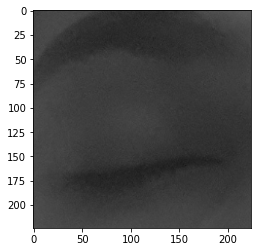

In [ ]:
# Lets display the new array
plt.imshow(new_array)

In [ ]:
# Normalizing the data
X_input=X_input/255.0

In [ ]:
# Making predictions with the new model
prediction= new_model.predict(X_input)
prediction

# The output returned a positive value which means the eyes are open.
# If the output returned a negative value it indicates the eyes are closed.

array([[0.11134821]], dtype=float32)

In [ ]:
# Using an unknown image from the internet to test our model
# We shall use the facial features of a sad woman
image = cv2.imread(r"C:\Users\PETER\Desktop\New folder\no_yawn\2244.jpg")

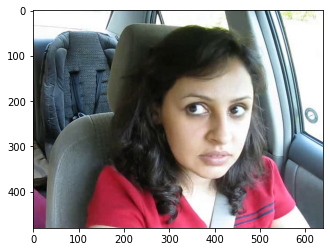

In [ ]:
# Lets plot the new image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
# Detecting the face from the image
# ---
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# We shall use haarcascade since it's an Object Detection Algorithm 
# used to identify faces in an image or a real time video

In [ ]:
# Creating a variable for eye mapping feature detection
# using the folder haarcascade_eye.xml 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
# Converting our image from rgb to gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Detecting different eyes from our folder haarcascade_eye.xml
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
# Drawing rectangles in the eyes for our image to detect the eyes
for(x,y,w,h) in eyes:
       cv2.rectangle(image, (x, y), (x+w,  y+h), (0, 255, 0), 2)

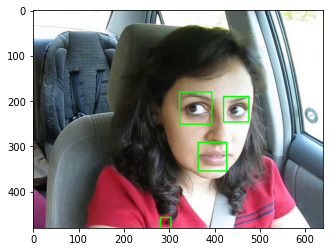

In [ ]:
# Displaying our drawn image for demonstration
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
#Cropping the eyes
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#print (faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,  x:x+w]
    roi_color = image[y:y+h,  x:x+w]

eyess = eye_cascade.detectMultiScale(roi_gray)
if len(eyess) == 0:
    print("eyes are not detected")
else:

    for (ex, ey, ew ,eh) in  eyess :
        eyes_roi=roi_color[ey: ey+eh, ex:ex  + ew]

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

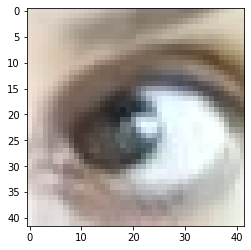

In [ ]:
# Lets display the cropped eye
plt.imshow(cv2.cvtColor(eyes_roi,  cv2.COLOR_BGR2RGB))

# Our model detects the eye in our test run

In [ ]:
# Lets check the shape
eyes_roi.shape

(42, 42, 3)

In [ ]:
# Resizing the image
final_image = cv2.resize(eyes_roi, (224,224))

# Need forth dimension
final_image = np.expand_dims(final_image,axis = 0)

# Normalizing our final image
final_image = final_image/255.0

In [ ]:
# Checking the shape of the image
final_image.shape

(1, 224, 224, 3)

In [ ]:
# Making predictions of our test final image
new_model.predict(final_image) 

# The output returns a positive value meaning the eyes are open therefore our model works

array([[0.12583649]], dtype=float32)

## 6. **Challenging the Solution**

### 6.1 **Real-time Demo**

In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
mixer.init()
sound = mixer.Sound('alarm.wav')
face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')
lbl=['Close','Open']
model = load_model('models/cnncat2.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]
while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye = reye.detectMultiScale(gray)
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )
    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye= r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict_classes(r_eye)
        if(rpred[0]==1):
            lbl='Open'
        if(rpred[0]==0):
            lbl='Closed'
        break
    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict_classes(l_eye)
        if(lpred[0]==1):
            lbl='Open'
        if(lpred[0]==0):
            lbl='Closed'
        break
    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score<0):
        score=0
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
        except: # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 7. **Follow up questions**

#### a) Did we have the right data

Yes. There was a satisfactory sample size that explored key factors which helped to predict whether a drivers eyes were open or closed while on the road.

#### b) Do we need other data to answer our questions

Since the data was adequate, there is no need for more as the question was answered.

#### C Did we have the right question

Yes we did. We were able to create models that helped made predictions of the housing prices

## **Conclusion**

 The model had an accuracy level of 98%; this indicated an overfitting model.
 
The basis of the fatigue detection system are the algorithms responsible for detecting facial features and their motion.
We have experimentally determined that a Haar-like-based face detection approach performs well in a common driving setup where a camera is positioned on a dashboard of a car and the driver monitors the road ahead. 


## **Recommendation**

(i)To increase the overall user friendliness of the system, read the manual provided.

(ii)This system can be used in any automobile with ease, especially long distance trucks.

(iii)Avoid exposing hardware to water, as it can damage the electric circuits.

(iv)Clear software cache every now and then for accuracy and speed
